### Making Predictions for Liverpool Football Club  in the English Premier League 
#### data was collected from 1993 - 2021
- gathering of the data can be found [here]()

### Import & Inspect 

In [1]:
import pandas as pd 
df = pd.read_csv('https://raw.githubusercontent.com/CVanchieri/DataSets/master/EnglishPremierLeagueData/EPL_data.csv') # read in the data 
### select columns wanted ###
columns = ["Div", "GameDate", "HomeTeam", "AwayTeam", "FTHG", "FTAG", 
           "HTHG", "HTAG", "HTR", "HS", "AS", "HST", "AST", 
           "HC", "AC", "HF", "AF", "HY", "AY", "HR", "AR", "FTR"] 
df = df[columns]
### relabeling columns ###
df = df.rename(columns={"Div": "Division", "FTHG": "FullTimeHomeGoals", "FTAG": "FullTimeAwayGoals", 
                        "HTHG": "HalfTimeHomeGoals", "HTAG": "HalfTimeAwayGoals", "HTR": "HalfTimeResult", 
                        "HS": "HomeShots", "AS": "AwayShots", "HST": "HomeShotsOnTarget", "AST": "AwayShotsOnTarget", 
                        "HC": "HomeCorners", "AC": "AwayCorners", 
                        "HF": "HomeFouls", "AF": "AwayFouls", "HY": "HomeYellowCards", 
                        "AY": "AwayYellowCards", "HR": "HomeRedCards", "AR": "AwayRedCards", 
                        "FTR": "FullTimeResult"})
print('data frame shape:', df.shape) # show the shape
print('--- data frame ---')
df.tail()

data frame shape: (10332, 22)
--- data frame ---


,Division,GameDate,HomeTeam,AwayTeam,FullTimeHomeGoals,FullTimeAwayGoals,HalfTimeHomeGoals,HalfTimeAwayGoals,HalfTimeResult,HomeShots,AwayShots,HomeShotsOnTarget,AwayShotsOnTarget,HomeCorners,AwayCorners,HomeFouls,AwayFouls,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards,FullTimeResult
10327,NaN,2021-11-05,Crystal Palace,Aston Villa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10328,NaN,2021-12-05,Chelsea,Arsenal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10329,NaN,2021-12-05,Newcastle,Man City,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10330,NaN,2021-12-05,Southampton,Fulham,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10331,NaN,2021-12-05,Spurs,Wolves,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Inspect 

In [2]:
### inspecting the data ###
print('--- INSPECTING THE DATA --- ')
print('--- columns --- ')
print(df.columns) 
print('--- types --- ')
print(df.dtypes) 
print('--- NA counts --- ')
print(df.isna().sum()) 
print('--- object descriptions --- ')
print(df.describe(include=object))
print('--- numericals descriptions --- ')
df.describe()

--- INSPECTING THE DATA --- 
--- columns --- 
Index(['Division', 'GameDate', 'HomeTeam', 'AwayTeam', 'FullTimeHomeGoals',
       'FullTimeAwayGoals', 'HalfTimeHomeGoals', 'HalfTimeAwayGoals',
       'HalfTimeResult', 'HomeShots', 'AwayShots', 'HomeShotsOnTarget',
       'AwayShotsOnTarget', 'HomeCorners', 'AwayCorners', 'HomeFouls',
       'AwayFouls', 'HomeYellowCards', 'AwayYellowCards', 'HomeRedCards',
       'AwayRedCards', 'FullTimeResult'],
      dtype='object')
--- types --- 
Division              object
GameDate              object
HomeTeam              object
AwayTeam              object
FullTimeHomeGoals    float64
FullTimeAwayGoals    float64
HalfTimeHomeGoals    float64
HalfTimeAwayGoals    float64
HalfTimeResult        object
HomeShots            float64
AwayShots            float64
HomeShotsOnTarget    float64
AwayShotsOnTarget    float64
HomeCorners          float64
AwayCorners          float64
HomeFouls            float64
AwayFouls            float64
HomeYellowCards    

,FullTimeHomeGoals,FullTimeAwayGoals,HalfTimeHomeGoals,HalfTimeAwayGoals,HomeShots,AwayShots,HomeShotsOnTarget,AwayShotsOnTarget,HomeCorners,AwayCorners,HomeFouls,AwayFouls,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards
count,9952.000000,9952.000000,9028.000000,9028.000000,7508.000000,7508.000000,7508.000000,7508.000000,7508.000000,7508.000000,7508.000000,7508.000000,7508.000000,7508.000000,7508.000000,7508.000000
mean,1.519494,1.129321,0.682211,0.493908,13.544885,10.557272,6.281700,4.841369,6.140783,4.785296,11.439931,12.013319,1.403170,1.764518,0.064198,0.091902
std,1.295083,1.128582,0.832703,0.715762,5.231931,4.514801,3.350475,2.817954,3.100170,2.727778,3.808768,3.966200,1.189885,1.272391,0.256280,0.300656
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,7.000000,4.000000,3.000000,4.000000,3.000000,9.000000,9.000000,0.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,13.000000,10.000000,6.000000,4.000000,6.000000,4.000000,11.000000,12.000000,1.000000,2.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,13.000000,8.000000,6.000000,8.000000,6.000000,14.000000,14.000000,2.000000,3.000000,0.000000,0.000000
max,9.000000,9.000000,5.000000,5.000000,43.000000,30.000000,24.000000,20.000000,20.000000,19.000000,33.000000,29.000000,7.000000,9.000000,3.000000,2.000000


In [3]:
### view basic feature correlations ###
print('--- feature correlations ---')
df.corr()

--- feature correlations ---


,FullTimeHomeGoals,FullTimeAwayGoals,HalfTimeHomeGoals,HalfTimeAwayGoals,HomeShots,AwayShots,HomeShotsOnTarget,AwayShotsOnTarget,HomeCorners,AwayCorners,HomeFouls,AwayFouls,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards
FullTimeHomeGoals,1.000000,-0.046725,0.687107,-0.024468,0.276874,-0.122936,0.414782,-0.097352,0.025293,-0.064600,-0.074060,-0.042153,-0.113501,-0.002113,-0.077432,0.078762
FullTimeAwayGoals,-0.046725,1.000000,-0.042310,0.679402,-0.120362,0.309908,-0.107096,0.435998,-0.066816,0.039993,0.014148,-0.031566,0.113346,-0.025824,0.117494,-0.064014
HalfTimeHomeGoals,0.687107,-0.042310,1.000000,-0.032522,0.115088,-0.029208,0.243708,-0.037713,-0.057814,0.013728,-0.011359,-0.024477,-0.082326,-0.001169,-0.031573,0.037260
HalfTimeAwayGoals,-0.024468,0.679402,-0.032522,1.000000,-0.043351,0.162396,-0.060432,0.271888,-0.012932,-0.027311,-0.007705,0.003152,0.096142,-0.009680,0.074558,-0.020553
HomeShots,0.276874,-0.120362,0.115088,-0.043351,1.000000,-0.312168,0.688959,-0.230759,0.466917,-0.272966,-0.170514,-0.030624,-0.108644,0.016476,-0.107160,0.092139
AwayShots,-0.122936,0.309908,-0.029208,0.162396,-0.312168,1.000000,-0.246394,0.703604,-0.303066,0.461305,0.030516,-0.129900,0.111042,-0.071484,0.101933,-0.100541
HomeShotsOnTarget,0.414782,-0.107096,0.243708,-0.060432,0.688959,-0.246394,1.000000,-0.036281,0.355743,-0.164554,-0.072125,0.014263,-0.134713,-0.001061,-0.072724,0.081674
AwayShotsOnTarget,-0.097352,0.435998,-0.037713,0.271888,-0.230759,0.703604,-0.036281,1.000000,-0.173634,0.349285,0.067802,-0.054601,0.068776,-0.050803,0.098951,-0.070209
HomeCorners,0.025293,-0.066816,-0.057814,-0.012932,0.466917,-0.303066,0.355743,-0.173634,1.000000,-0.233510,-0.091741,0.009977,-0.057928,0.028870,-0.053963,0.045427
AwayCorners,-0.064600,0.039993,0.013728,-0.027311,-0.272966,0.461305,-0.164554,0.349285,-0.233510,1.000000,0.023940,-0.062776,0.045018,-0.040667,0.066785,-0.065921


--- feature correlations heatmap ---


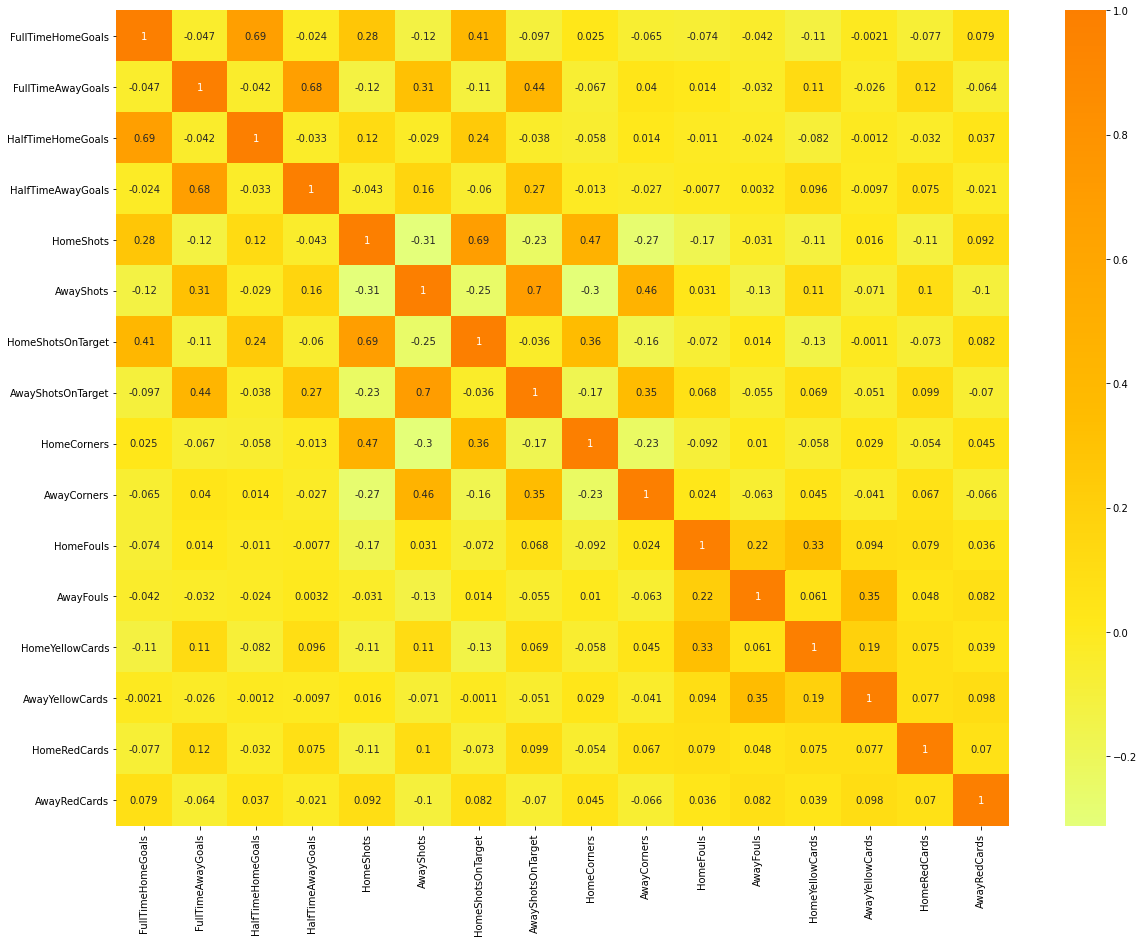

In [4]:
### view basic feature correlations in a heatmap ###
import seaborn as sns 
import matplotlib.pyplot as plt 
f, ax = plt.subplots(1, 1, figsize = (20, 15))
print('--- feature correlations heatmap ---')
sns.heatmap(df.corr() , cmap = 'Wistia' , annot = True)

#### Cleaning + Engineering

In [5]:
import numpy as np
import datetime as dt
from datetime import datetime
from sklearn.preprocessing import LabelEncoder

def wrangle(X):
    """Wrangle data"""
    # prevent SettingWithCopyWarning with a copy.
    X = X.copy()
    ### fill target NA, relabel target values ###
    X['FullTimeResult'] = X['FullTimeResult'].fillna('Not Played')    
    X['FullTimeResult'] = X['FullTimeResult'].replace({'H':'Home', 'A': 'Away', 'D': 'Tied'}) 
    X['HalfTimeResult'] = X['HalfTimeResult'].astype(object)
    X['FullTimeResult'] = X['FullTimeResult'].astype(object)
    ### create some new features ###
    X['GameDate'] = pd.to_datetime(X['GameDate'], infer_datetime_format=True) 
    X['Year'] = X['GameDate'].dt.year
    X['Month'] = X['GameDate'].dt.month
    X['Day'] = X['GameDate'].dt.day
    X['GameDate'] = X.GameDate.astype(str)
    ### dropping columns ###
    dropped_columns = ['FullTimeHomeGoals', 'FullTimeAwayGoals']
    X = X.drop(columns=dropped_columns)
    columns = ['GameDate', 'HomeTeam', 'AwayTeam','HalfTimeHomeGoals', 'HalfTimeAwayGoals',
       'HalfTimeResult', 'HomeShots', 'AwayShots', 'HomeShotsOnTarget',
       'AwayShotsOnTarget', 'HomeCorners', 'AwayCorners', 'HomeFouls',
       'AwayFouls', 'HomeYellowCards', 'AwayYellowCards', 'HomeRedCards',
       'AwayRedCards', 'FullTimeResult']
    X = X[columns]
    X = X.drop_duplicates()
    return X

df = wrangle(df) # wrangle the data 

In [6]:
### splitting data by date ### 
X_train = df[df['GameDate'] < '2020-09-12']
y_train = X_train['FullTimeResult']
X_train = X_train.drop(columns=['FullTimeResult'])
X_val = df[df['GameDate'] > '2020-09-12']
y_val = X_val['FullTimeResult']
X_val = X_val.drop(columns=['FullTimeResult'])
### show shapes ###
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

X_train shape: (9977, 18)
y_train shape: (9977,)
X_val shape: (355, 18)
y_val shape: (355,)


# RandomForrestClassifier model.

### Train/test split the data frame, train/val/test.

In [7]:
### save the ids for later, so we can look up actual results ###
train_id = X_train['GameDate']
val_id = X_val['GameDate']

In [8]:
!pip install category_encoders

## RandomForestClassifier model.

In [9]:
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
### creating pipeline ### 
model = make_pipeline(
                      ce.OrdinalEncoder(), 
                      SimpleImputer(strategy='median'),
                      StandardScaler(),
                      RandomForestClassifier(random_state=42, n_jobs=-1)
                      )
# fit the model on the data.
model.fit(X_train, y_train)
val_pred = model.predict(X_val)
### create predictions data frame ###
val_pred_df = pd.DataFrame(val_pred, columns=["Predicted_Values" ])
v_test_df = pd.DataFrame(np.array(y_val), columns=["Real_Values"])
df_final = pd.concat([v_test_df , val_pred_df] , axis=1)
print('--- real values vs predicted values ---')
print(df_final.head())
### get the model metrics ###
print('--- model metrics ---')
print("model score:", model.score(X_val, y_val)) # show the model score 
print("Precision Score:",metrics.precision_score(y_val, val_pred, 
                                           pos_label='positive',
                                           average='micro'))
print("Recall Score: ",metrics.recall_score(y_val, val_pred, 
                                           pos_label='positive',
                                           average='micro'))
print("f1 score Score:",metrics.f1_score(y_val, val_pred, 
                                           pos_label='positive',
                                           average='micro'))
print('--- confusion matrix ---')
print(metrics.confusion_matrix(y_val,val_pred)) # confusion matrix
print('--- classification report ---') 
print(metrics.classification_report(y_val,val_pred)) # classificatin report
print('model accuracy score=', metrics.accuracy_score(y_val, val_pred)) # model accuracy

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


--- real values vs predicted values ---
  Real_Values Predicted_Values
0        Home             Home
1        Tied             Away
2        Home             Home
3        Home             Home
4        Away             Tied
--- model metrics ---
model score: 0.2507042253521127
Precision Score: 0.2507042253521127
Recall Score:  0.2507042253521127
f1 score Score: 0.2507042253521127
--- confusion matrix ---
[[ 64  17   0   1]
 [ 43  24   0   1]
 [114  39   0   2]
 [ 38  11   0   1]]
--- classification report ---
              precision    recall  f1-score   support

        Away       0.25      0.78      0.38        82
        Home       0.26      0.35      0.30        68
  Not Played       0.00      0.00      0.00       155
        Tied       0.20      0.02      0.04        50

    accuracy                           0.25       355
   macro avg       0.18      0.29      0.18       355
weighted avg       0.14      0.25      0.15       355

model accuracy score= 0.2507042253521127


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
# create a new data frame for predictions vs. actuals.
val_predictions = pd.DataFrame({
    'GameDate': val_id, 
    'prediction': val_pred, 
    'Actual': y_val
})
val_predictions = val_predictions.drop_duplicates()
# # merge the new data frame with necessary features from origninal.
val_predictions = val_predictions.merge( 
     X_val[['GameDate','HomeTeam', 'AwayTeam']],
     how='left'
)
val_predictions = val_predictions.drop_duplicates(subset=['GameDate', 'HomeTeam'])
# show the shape of the data frame.
print(val_predictions.shape)
# show the data frame with headers.
val_predictions.head(10)

(355, 5)


,GameDate,prediction,Actual,HomeTeam,AwayTeam
0,2020-10-01,Home,Home,Sheffield United,West Ham
1,2020-11-01,Away,Tied,Crystal Palace,Arsenal
2,2020-11-01,Away,Tied,Chelsea,Burnley
3,2020-11-01,Away,Tied,Everton,Brighton
4,2020-11-01,Away,Tied,Leicester,Southampton
5,2020-11-01,Away,Tied,Man United,Norwich
6,2020-11-01,Away,Tied,Wolves,Newcastle
7,2020-11-01,Away,Tied,Tottenham,Liverpool
36,2020-12-01,Away,Away,Bournemouth,Watford
37,2020-12-01,Away,Away,Aston Villa,Man City


#### Feature Importance

--- top features ---


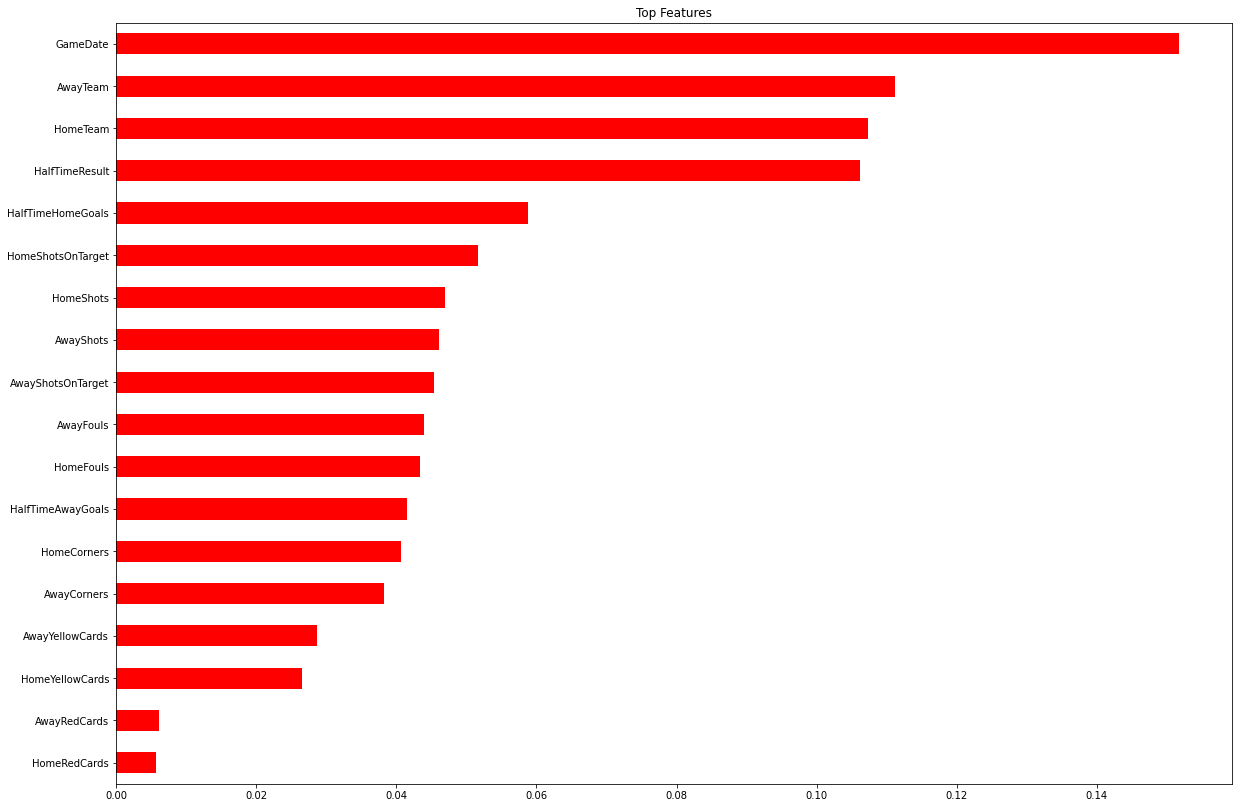

In [11]:
### most used features ###
rf = model.named_steps['randomforestclassifier'] # named_steps 
importances = pd.Series(rf.feature_importances_, X_val.columns) # feature_importances 
%matplotlib inline
import matplotlib.pyplot as plt

### set how many features ###
n = 20
## configure plot ###
plt.figure(figsize=(20, 14))
plt.title(f'Top Features')
print('--- top features ---')
importances.sort_values()[-n:].plot.barh(color='red');

#### Predictions

--- prediction matrix ---


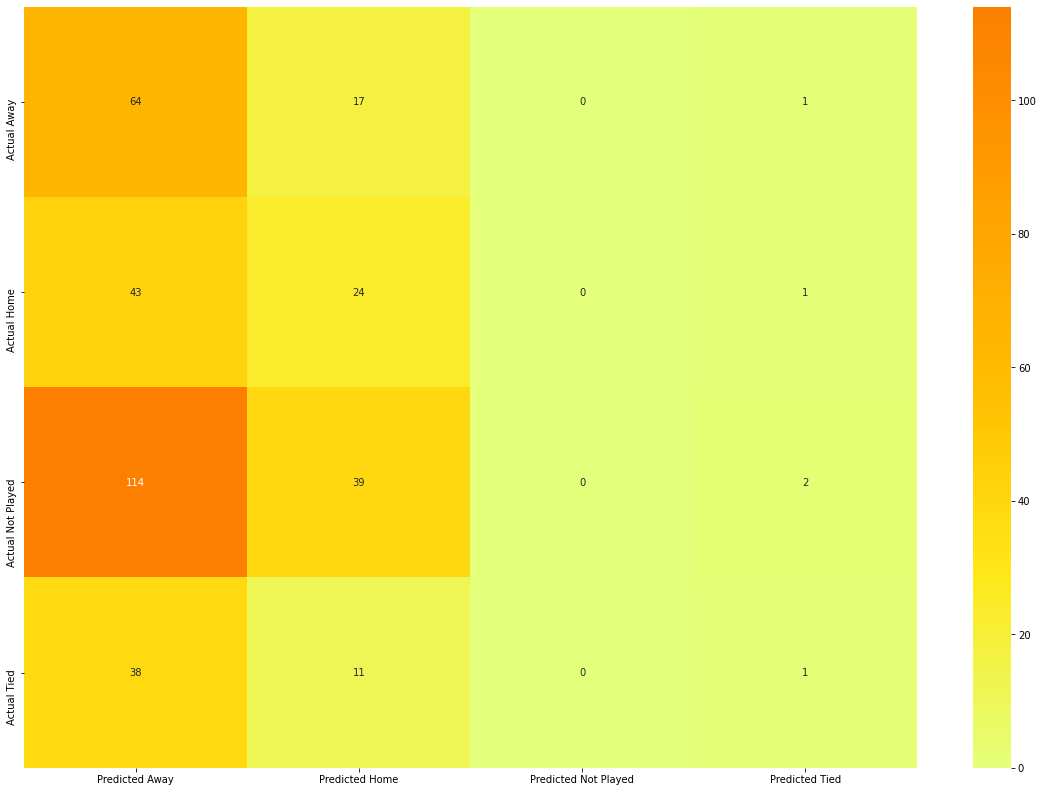

In [12]:
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
### function to plot confusion matrix ###
def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), 
                         columns=columns, index=index)
    return sns.heatmap(table, annot=True, fmt='d', cmap='Wistia')
print('--- prediction matrix ---')
plt.subplots(1, 1, figsize = (20, 14))
plot_confusion_matrix(y_val, val_pred);
plt.show()

In [13]:
### final data frame ###
val_predictions['Correct?'] = np.where(val_predictions['prediction'] == val_predictions['Actual'], 'Yes', 'No') # new column for correct or not 
val_predictions['Correct?'][val_predictions.Actual == 'Not Played'] = "Not Played"
EPL_predictions = val_predictions.sort_values('GameDate')
print('--- predicted counts ---')
print(EPL_predictions['Correct?'].value_counts())
print('--- final predictions ---')
EPL_predictions = EPL_predictions.sort_values('GameDate')
EPL_predictions.head(50)

--- predicted counts ---
Not Played    156
Yes           100
No             99
Name: Correct?, dtype: int64
--- final predictions ---


,GameDate,prediction,Actual,HomeTeam,AwayTeam,Correct?
89,2020-09-13,Away,Away,West Brom,Leicester,Yes
90,2020-09-13,Away,Away,Spurs,Everton,Yes
91,2020-09-14,Away,Away,Sheffield Utd,Wolves,Yes
92,2020-09-14,Away,Away,Brighton,Chelsea,Yes
96,2020-09-19,Home,Home,Arsenal,West Ham,Yes
95,2020-09-19,Home,Home,Man Utd,Crystal Palace,Yes
94,2020-09-19,Home,Home,Leeds,Fulham,Yes
93,2020-09-19,Home,Home,Everton,West Brom,Yes
101,2020-09-20,Away,Away,Southampton,Spurs,Yes
102,2020-09-20,Away,Away,Newcastle,Brighton,Yes


In [16]:
### filter only liverpool games ###
LPFCH =  EPL_predictions[EPL_predictions['HomeTeam']=='Liverpool']
LPFCA =  EPL_predictions[EPL_predictions['AwayTeam']=='Liverpool']
# merge the 2 data sets to create an only 'Liverpool' data set.
liverpool_final = pd.concat([LPFCH, LPFCA], sort=False, ignore_index=True)
liverpool_final['GameDate'] = pd.to_datetime(liverpool_final['GameDate']).dt.date
print('data frame shape:', liverpool_final.shape) # show the shape
print('--- predicted counts ---')
print(liverpool_final['Correct?'].value_counts())
print('--- Liverpool predictions ---')
liverpool_final.sort_values('GameDate')

data frame shape: (36, 6)
--- predicted counts ---
Not Played    16
Yes           11
No             9
Name: Correct?, dtype: int64
--- Liverpool predictions ---


,GameDate,prediction,Actual,HomeTeam,AwayTeam,Correct?
18,2020-09-20,Away,Away,Chelsea,Liverpool,Yes
0,2020-09-28,Away,Away,Liverpool,Arsenal,Yes
19,2020-10-17,Away,Tied,Everton,Liverpool,No
1,2020-10-24,Away,Tied,Liverpool,Sheffield Utd,No
2,2020-10-31,Away,Away,Liverpool,West Ham,Yes
20,2020-11-01,Away,Tied,Tottenham,Liverpool,No
3,2020-11-22,Away,Away,Liverpool,Leicester,Yes
21,2020-11-28,Away,Tied,Brighton,Liverpool,No
4,2020-12-09,Away,Away,Liverpool,Leeds,Yes
22,2020-12-13,Home,Home,Fulham,Liverpool,Yes
